In [1]:
## Import necessary lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

# from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
from pdf2image import convert_from_path
import pytesseract as pyt

In [2]:
data_path = './test_data/patient_form.pdf'

In [3]:
## Save the scanned pdf into image 
pages = convert_from_path(data_path)
for page in pages:
  page.save('./test_data/patient_form.jpg', 'JPEG')

In [4]:
## Read image
# plt.figure(figsize=(12,10))
img = './test_data/patient_form.jpg'
## Load sample image using cv2
img_form = cv2.imread(img)
# print('Patient-Form')
cv2.imshow('Patient-Form',img_form)
# plt.imshow(img_form)
# plt.title('Patient-Form')
# plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/Indranath.Chatterjee/ocr_demo/ocr-project-venv/lib/python3.10/site-packages/cv2/qt/plugins"


In [5]:
type(img_form)

numpy.ndarray

In [6]:
imageForm = img_form.astype("uint8")

In [7]:
imageForm

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Extracting Text without preprocessing the image

In [9]:
## Extract text from image_opencv
txt_wo = pyt.image_to_string(imageForm)
print(txt_wo)

NETWORK HOSPITAL - DECLARATION BY PATIENT/PATIENT’S ATTENDANT

Name of the Hospital :......::ssssnsssmesssonnnseesnrnsstseeteenmunenssnsntsrstremsnmessesnennnssnernenseeseer DAte ;

PAGE OSS ns cascssccc ccc cncees ove sovernore ove ersenvcoscnnese ss s00 sas cavanscenensece-eesenvensenoemnennens ensed ses see pte see eee sue cuneme euremewnsesqmenssnssnsenne ensncament®

Declaration Insurance trike off the which is not
(i) Declaration when patient has no insurance policy:
© declare that | do not have any insurance policy.

(ii) Declaration when patient has insurance policy:
© | declare that | have following Insurance Policies

Policy No/TPA card No:
Insurance Company:

2) Whether patient opted for Eligible Room Category under Policy:
Yes / No

3) In case, policyholder wishes to avail better facility:

Name of the Additional Facility/ Provision/ Procedure/ Treatment ........-cssossoscssemseesesesseeseesenesenseeeesen

‘eeses ances meenseesmens covemosssessnnies sesmmasessecmeeesermmere

In [10]:
with open('./extracted_2/ext_txt_wo_prepro.txt', 'w') as f:
    f.write(txt_wo)

## Image Preprocessing using OpenCV

In [11]:
imageForm.shape, imageForm.shape[0], imageForm.shape[1]

((2200, 1554, 3), 2200, 1554)

In [12]:
## 1. Normalization
norm_img_0 = np.zeros((imageForm.shape[0], imageForm.shape[1]))
imgNorm = cv2.normalize(imageForm, norm_img_0, 0, 255, cv2.NORM_MINMAX)

In [13]:
imgNorm

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
np.min(imgNorm), np.max(imgNorm)

(0, 255)

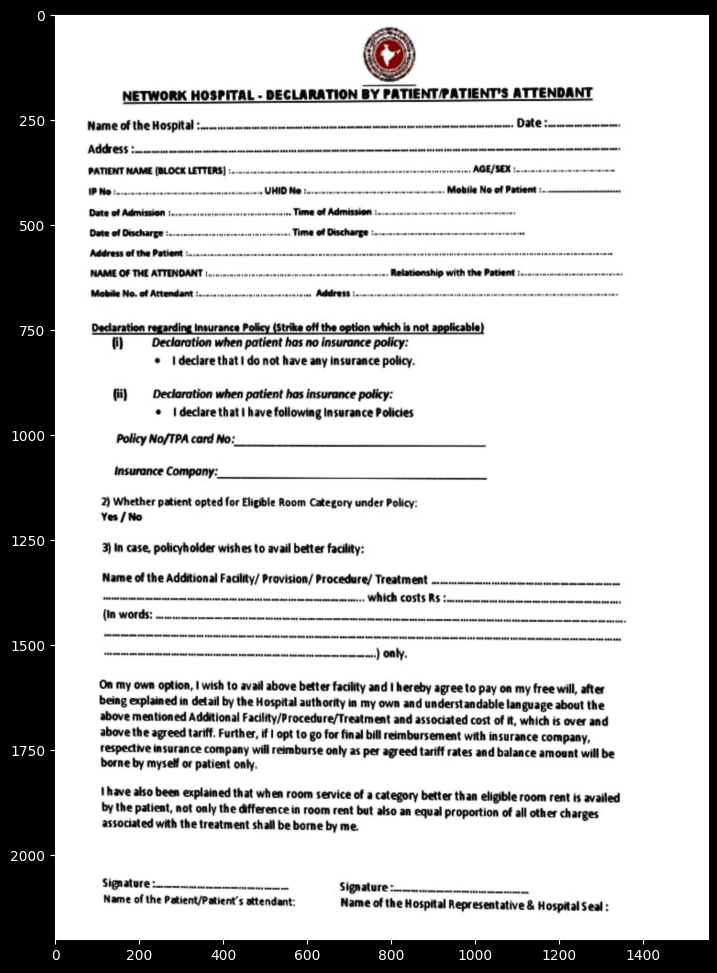

In [15]:
plt.figure(figsize=(15,12))
plt.imshow(imgNorm)
plt.show()

## 2. Gray Scale image

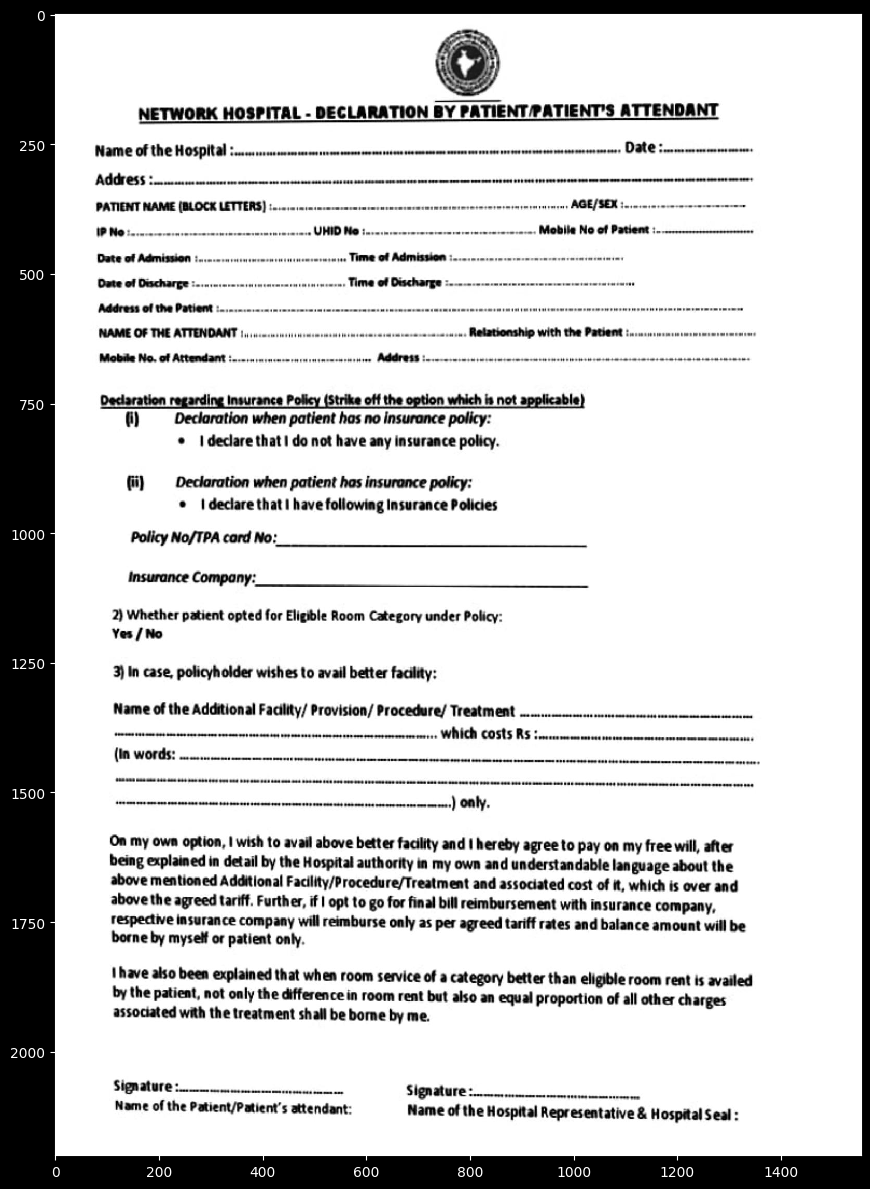

In [16]:
# Convert to grayscale

imgGray = cv2.cvtColor(imgNorm, cv2.COLOR_BGR2GRAY)
cv2.imshow('Binary-Image-1', imgGray)
cv2.waitKey(0)
cv2.destroyAllWindows()


# from skimage import color
# from skimage import io

# imgGray = color.rgb2gray(imgNorm)
# io.imshow(imgGray)

In [22]:
imgGray = imgGray.astype("uint8")

In [23]:
imgGray.shape   ## Image dimension has been changed

(2200, 1554)

## Image Thresolding or Binarization
- It means converting a Coloured image to Binary image (containing only black & white colours).

In [24]:
imgGray.dtype

dtype('uint8')

In [25]:
# Threshold the image to create a binary image  using Otsu’s Binarization
thresh, imgBinary_thr = cv2.threshold(imgGray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

In [27]:
imgBinary_thr = imgBinary_thr.astype("uint8")

In [28]:
imgBinary_thr ## contains binary image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

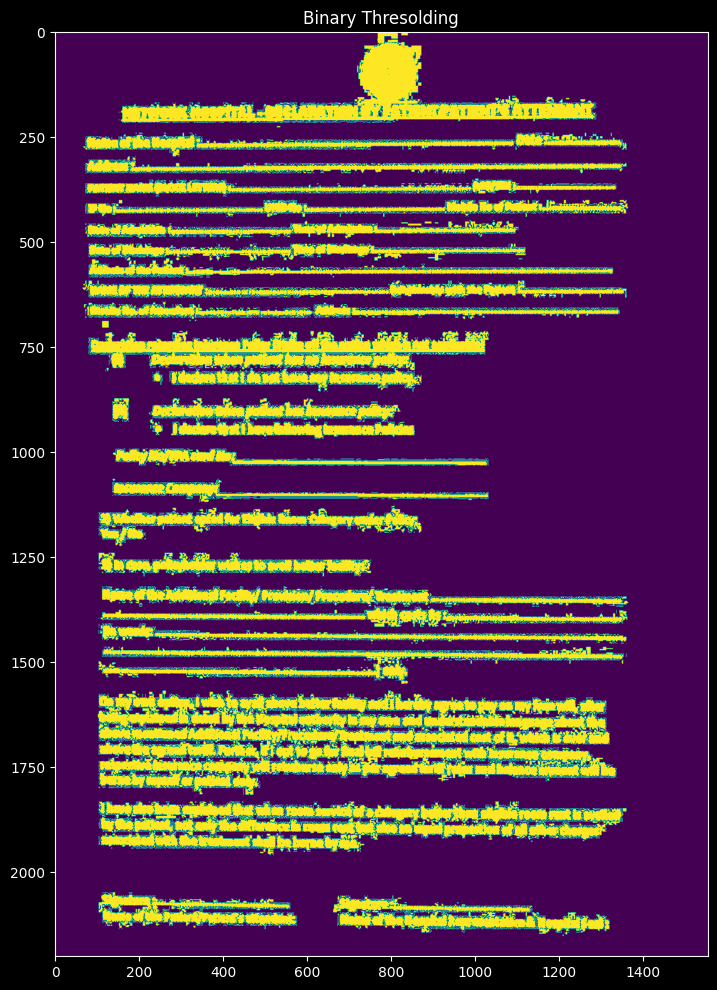

In [29]:
plt.figure(figsize=(15,12))
plt.imshow(imgBinary_thr)
plt.title('Binary Thresolding')
plt.show()

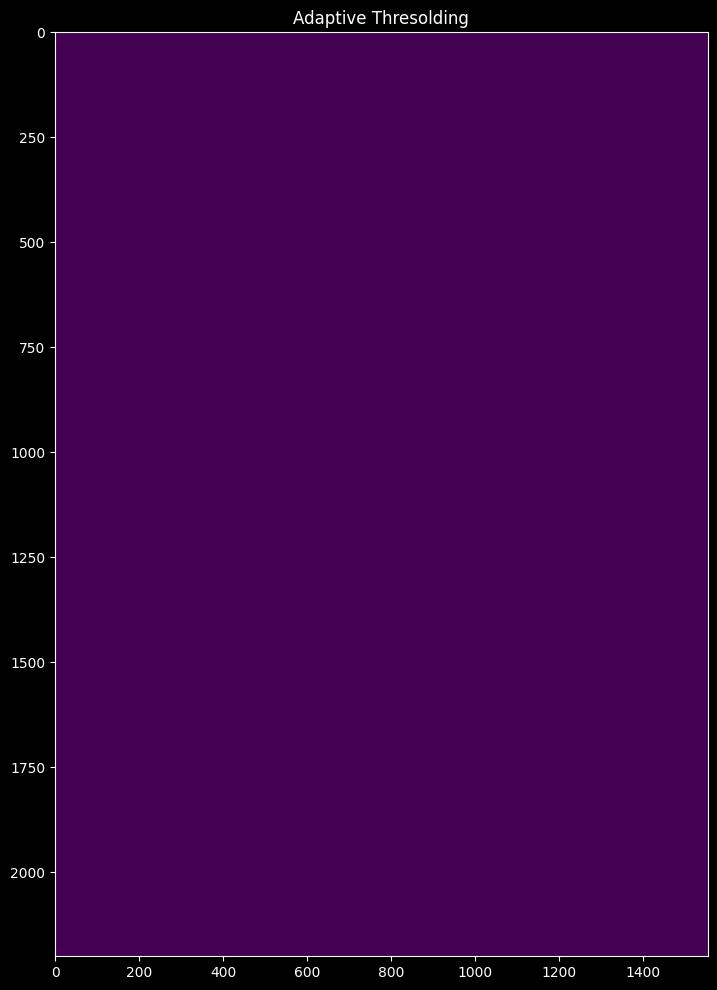

In [30]:
# Apply adaptive thresholding with 199 neighborhood pixels and C constant value of 5
imgAdaptv_thr = cv2.adaptiveThreshold(imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 41,15)
imgAdaptv_thr = imgAdaptv_thr.astype("uint8")
plt.figure(figsize=(15,12))
plt.imshow(imgAdaptv_thr)
plt.title('Adaptive Thresolding')
plt.show()
## applying different thresholding 
# techniques on the input image
# thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#                                           cv2.THRESH_BINARY, 199, 5)
  
# thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                           cv2.THRESH_BINARY, 199, 5)

In [33]:
imgGray.dtype,imgNorm.dtype, imgBinary_thr.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

## Noise Removal

In [31]:
# denoising of image saving it into dst image 
imgDenoise1 = cv2.fastNlMeansDenoising(imgGray, None, 10, 10, 7, 15)   ## dimension issue
imgDenoise1 = imgDenoise1.astype("uint8") 
# dst = cv2.fastNlMeansDenoisingColored(img_norm0, None, 10, 10, 7, 15) ## None: as we are using colored image
# dst = cv2.fastNlMeansDenoisingColored(imgGray, None, 10, 10, 7, 15) 
# Plotting of source and destination image 
# plt.subplot(121), plt.imshow(imageG) 
# plt.subplot(122), plt.imshow(imgDenoise1) 
# plt.show()
plt.figure(figsize=(15,12))
plt.imshow(imgDenoise1)
plt.title('Noise Remove')
plt.show()
## applying 

error: OpenCV(4.7.0) /io/opencv/modules/photo/src/denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'fastNlMeansDenoisingColored'


## Thinning and Skeletonization
- This is not required for now, as this pdf doesn't contain handwritten text part

## Image Scaling
- https://towardsdatascience.com/image-processing-image-scaling-algorithms-ae29aaa6b36c

In [34]:
imgGray.shape       ## height and width

(2200, 1554)

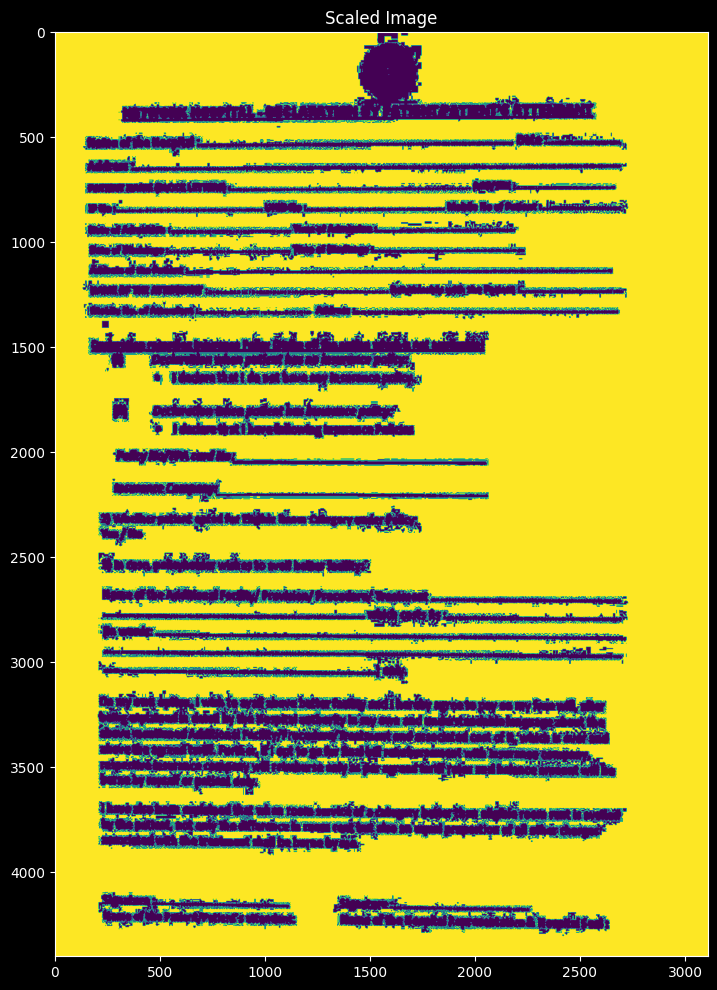

In [35]:
height, width = imgGray.shape
scale_factor = 2.0    ## resize the image to 200% of its original
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)
new_size = (new_width, new_height)

# Resize the image using the new dimensions
imgScaled = cv2.resize(imgGray, new_size, fx = 1.2, fy = 1.5, interpolation = cv2.INTER_LINEAR)

## fx: A scaling factor along the horizontal axis.
## fy: A scaling factor along the vertical axis.

## Displaying the Scaled image
plt.figure(figsize=(15,12))
plt.imshow(imgScaled)
plt.title('Scaled Image')
plt.show()

# # Save the resized image
# cv2.imwrite("resized_image.jpg", resized_image)


In [36]:
imgScaled.shape, imgScaled.dtype

((4400, 3108), dtype('uint8'))

## Skew Correction

In [37]:
#skew correction

def deskew(image):

    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, 
                             borderMode=cv2.BORDER_REPLICATE)
    
    return rotated


In [38]:
img_ds=deskew(imgScaled)

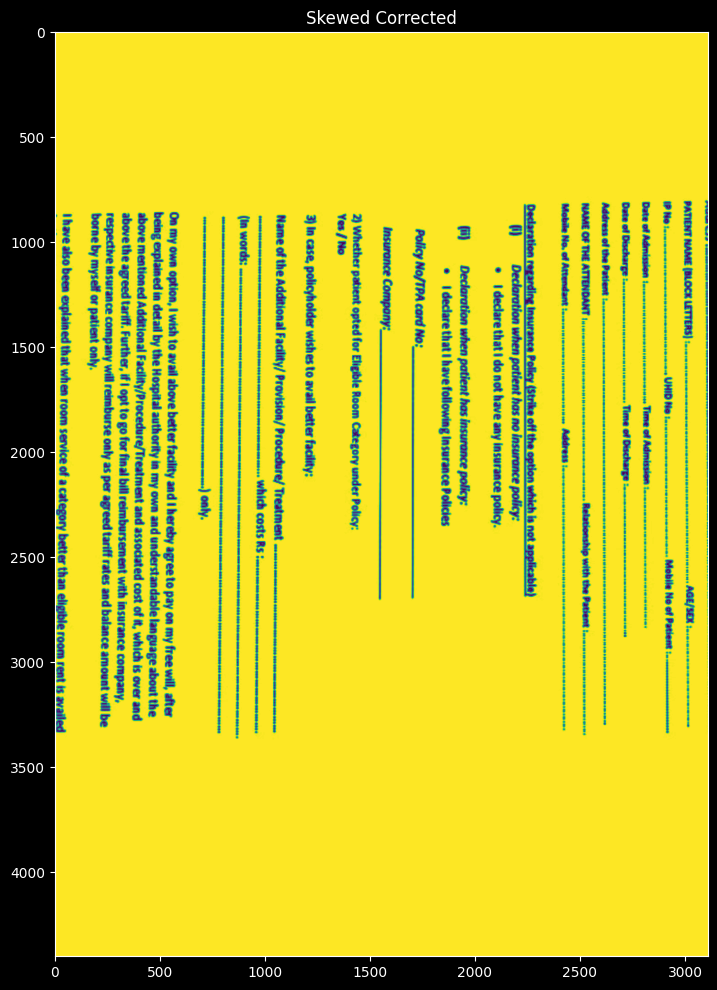

In [57]:
plt.figure(figsize=(15,12))
plt.imshow(img_ds)
plt.title('Skewed Corrected')
plt.show()

In [62]:
# img_form = img_form.astype("uint8")
# imgScaled = imgScaled.astype("uint8")


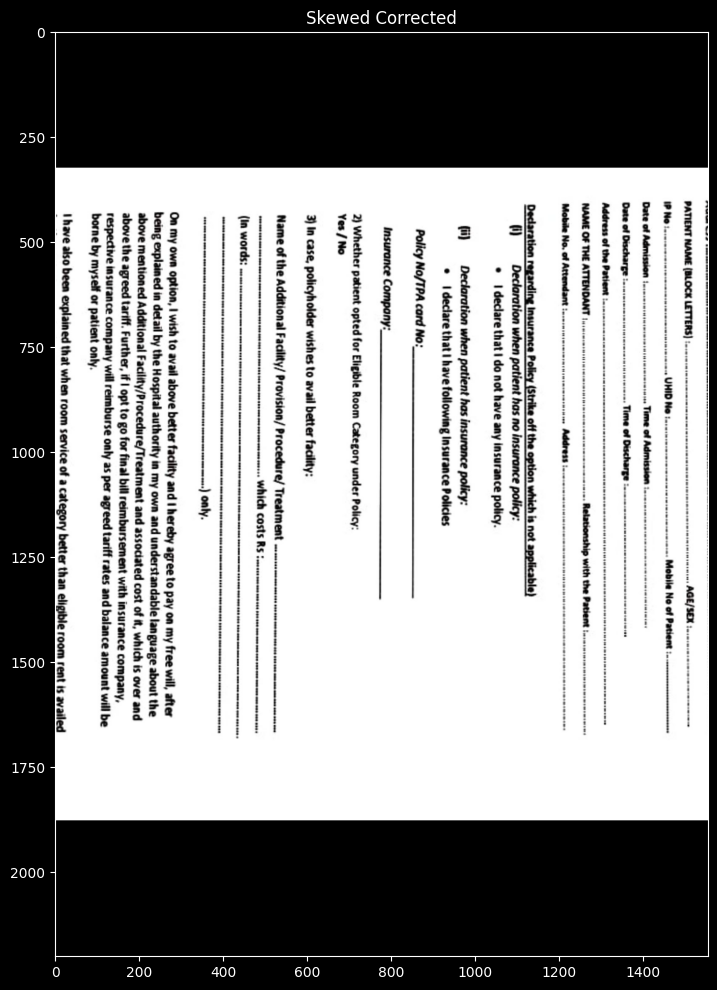

In [39]:


# Apply morphological closing to fill the gaps in the text
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closed = cv2.morphologyEx(imgScaled, cv2.MORPH_CLOSE, kernel)

# Find the contours of the text
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the maximum area
max_contour = max(contours, key=cv2.contourArea)

# Find the bounding box of the contour
rect = cv2.minAreaRect(max_contour)
box = cv2.boxPoints(rect)
box = np.int0(box)

# Find the angle of the skew
angle = rect[-1]

# Rotate the image to correct the skew
rows, cols = img_form.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2), -angle, 1)
imgRotated = cv2.warpAffine(img_form, M, (cols,rows))


plt.figure(figsize=(15,12))
plt.imshow(imgRotated)
plt.title('Skewed Corrected')
plt.show()

# # Apply OCR using Tesseract
# text = pytesseract.image_to_string(rotated)

# # Display the original and rotated images, and the extracted text
# cv2.imshow('Original Image', img)
# cv2.imshow('Rotated Image', rotated)
# print('Extracted Text: ', text)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# import sys
# from scipy.ndimage import interpolation as inter
# input_file = sys.argv[1]
# img = Image.open(input_file)
# convert to binary
# wd, ht = img.size
# pix = np.array(img.convert('1').getdata(), np.uint8)
# bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
# plt.imshow(bin_img, cmap='gray')
# plt.savefig('binary.png')

# def find_score(arr, angle):
#     data = inter.rotate(arr, angle, reshape=False, order=0)
#     hist = np.sum(data, axis=1)
#     score = np.sum((hist[1:] - hist[:-1]) ** 2)
#     return hist, score
# delta = 1
# limit = 5
# angles = np.arange(-limit, limit+delta, delta)
# scores = []
# for angle in angles:
#     hist, score = find_score(bin_img, angle)
#     scores.append(score)
# best_score = max(scores)
# best_angle = angles[scores.index(best_score)]
# print('Best angle: {}'.formate(best_angle))

# # correct skew
# data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
# img = Image.fromarray((255 * data).astype("uint8")).convert("RGB")
# # img.save('skew_corrected.png')

In [ ]:
## Romoving Border